In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [8]:
df = pd.read_csv(r"C:\Users\33695\OneDrive - Data ScienceTech Institute\_DSTI\ML with Python\Datasets-20230605\titanic.csv",sep=",",index_col="PassengerId")

In [9]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
df.tail(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [3]:
df = df.drop(columns="Cabin")

In [6]:
len(df)

891

In [7]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [8]:
df.loc[df.Embarked.isna(),:] # all colns, showing only rows where missing infos
# best to keep them as females are under represented + these 2 have survived --> model needs those for better prediction

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


In [8]:
df.loc[df.Embarked.isna(),:].index

Int64Index([62, 830], dtype='int64', name='PassengerId')

In [14]:
df = df.drop(index=df.loc[df.Embarked.isna(),:].index) # locating by rows where are missing values, and then drop rows at those indexes

In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [4]:
raw_df = df.copy() # you can make a copy of your dataframe (to avoid making mistakes with original one)

In [10]:
df.Pclass.value_counts() # distribution / frequency of the classes "Pclass"

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [11]:
df.groupby(["Pclass","Sex"]).mean().Age # grouping people by class, gender and avg age

C:\Users\33695\AppData\Local\Temp\ipykernel_748\761512763.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Pclass","Sex"]).mean().Age # grouping people by class, gender and avg age


Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

In [12]:
df.loc[df.Age.isna(),["Pclass","Sex"]] # all rows where the Age is missing, and give me only Pclass & Sex colns

,Pclass,Sex
PassengerId,,
6,3,male
18,2,male
20,3,female
27,3,male
29,3,female
...,...,...
860,3,male
864,3,female
869,3,male


In [13]:
average_ages = df.groupby(["Pclass","Sex"]).mean().Age.astype(int).to_dict() # creates dictionary with Ages put as integers

C:\Users\33695\AppData\Local\Temp\ipykernel_748\2373436549.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_ages = df.groupby(["Pclass","Sex"]).mean().Age.astype(int).to_dict() # creates dictionary with Ages put as integers


In [14]:
average_ages.keys() # to see what are the keys in the dict (here: 6 keys)

dict_keys([(1, 'female'), (1, 'male'), (2, 'female'), (2, 'male'), (3, 'female'), (3, 'male')])

In [15]:
average_ages[(1,"female")] # test the dictionary to check on 1 example

34

In [16]:
def age_guesser(Pclass_sex):       # age_guesser(1, "female") = 34
    Pclass_sex = tuple(Pclass_sex)
    age = average_ages[Pclass_sex]
    return age

In [17]:
age_guesser([1,"female"]) # call function and test

34

In [18]:
age_guesser([3,"male"]) # same test

26

In [22]:
# first way
# df = raw_df.copy()
for pclass,sex in average_ages.keys():     " best to loop over 6 keys only"
    temp_df = df.loc[(df.Pclass==pclass) & (df.Sex == sex),:] # give me the desired rows
    missing_values_index = temp_df.loc[temp_df.Age.isna()].index # loc on the rows that have missing age
    df.loc[missing_values_index,"Age"] = age_guesser([pclass,sex]) # for each key, assign the age_guesser to each missing value

IndentationError: unexpected indent (1378029457.py, line 3)

In [27]:
 df.groupby(["Pclass","Sex"]).mean().Age.astype(int).to_dict()

{(1, 'female'): 34,
 (1, 'male'): 41,
 (2, 'female'): 28,
 (2, 'male'): 30,
 (3, 'female'): 21,
 (3, 'male'): 26}

In [28]:
average_ages

{(1, 'female'): 34,
 (1, 'male'): 41,
 (2, 'female'): 28,
 (2, 'male'): 30,
 (3, 'female'): 21,
 (3, 'male'): 26}

In [29]:
raw_df.Age.isna().sum()

177

In [23]:
# second way
# df = raw_df.copy()
print("State of missing values before processing")
print(df.Age.isna().sum())
for pclass,sex in average_ages.keys():
    df.loc[(df.Pclass==pclass) & (df.Sex == sex),"Age"] = (
        df.loc[(df.Pclass==pclass) & (df.Sex == sex),"Age"].fillna(age_guesser([pclass,sex])) # same as what was done before with fillna() function
    )
print("State of missing values after processing")
print(df.Age.isna().sum())

State of missing values before processing
177
State of missing values after processing
0


In [24]:
df.groupby(["Pclass","Sex"]).mean().Age.astype(int).to_dict()

C:\Users\33695\AppData\Local\Temp\ipykernel_748\3022187191.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["Pclass","Sex"]).mean().Age.astype(int).to_dict()


{(1, 'female'): 34,
 (1, 'male'): 41,
 (2, 'female'): 28,
 (2, 'male'): 30,
 (3, 'female'): 21,
 (3, 'male'): 26}

In [32]:
df = raw_df.copy()

In [33]:
# third way to fill missing Ages
df.loc[df.Age.isna(),"Age"] = df.loc[df.Age.isna(),["Pclass","Sex"]].apply(age_guesser,axis=1) # apply function acts like a "for loop"

In [25]:
df.Age.isna().sum() # check

0

In [35]:
df.groupby(["Pclass","Sex"]).mean().Age.astype(int).to_dict()

{(1, 'female'): 34,
 (1, 'male'): 41,
 (2, 'female'): 28,
 (2, 'male'): 30,
 (3, 'female'): 21,
 (3, 'male'): 26}

In [26]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

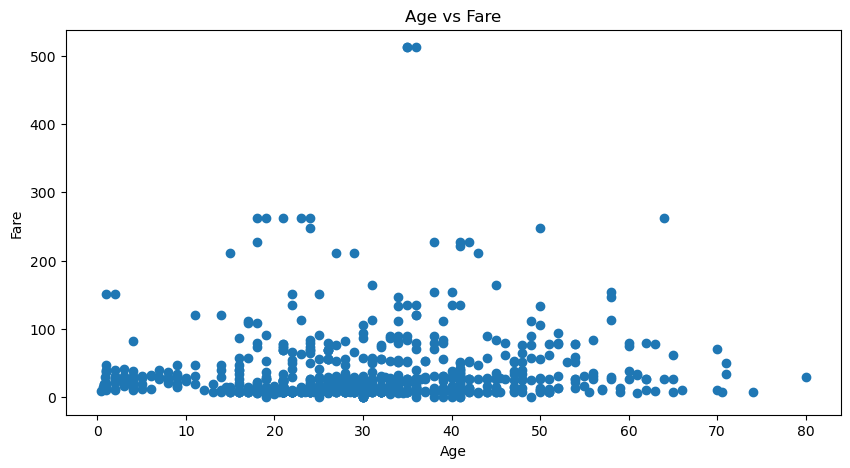

In [27]:
# now that i filled all my ages, i can plot
plt.figure(figsize=(10,5))
plt.scatter(df.Age,df.Fare)
plt.title("Age vs Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

In [28]:
df.Sex.value_counts().index

Index(['male', 'female'], dtype='object')

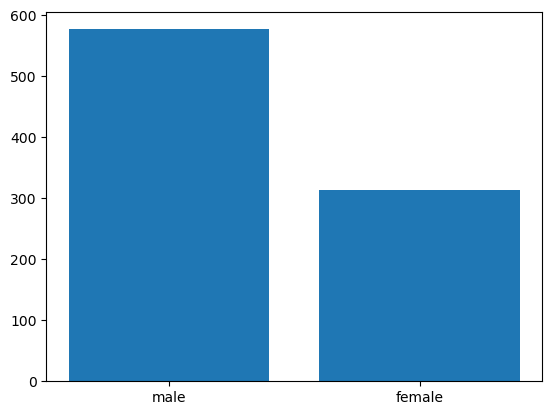

In [29]:
plt.bar(x=df.Sex.value_counts().index,height=df.Sex.value_counts())
plt.show()

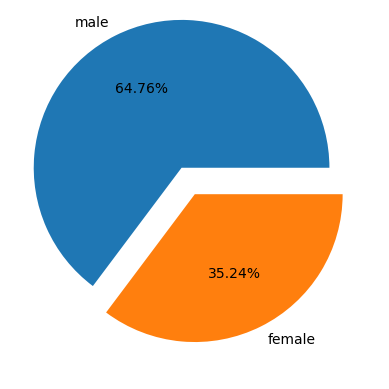

In [30]:
plt.pie(df.Sex.value_counts(),labels=df.Sex.value_counts().index,autopct='%1.2f%%',explode=[0.2,0])
plt.show()

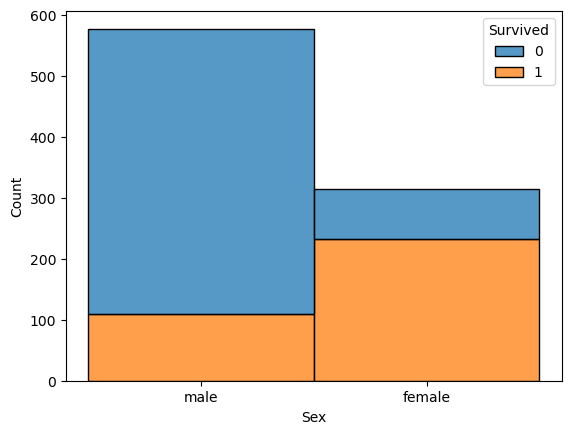

In [31]:
# with seaborn, plot partition of survival per gender
sns.histplot(x="Sex",hue="Survived",multiple="stack",data=df)
plt.show()

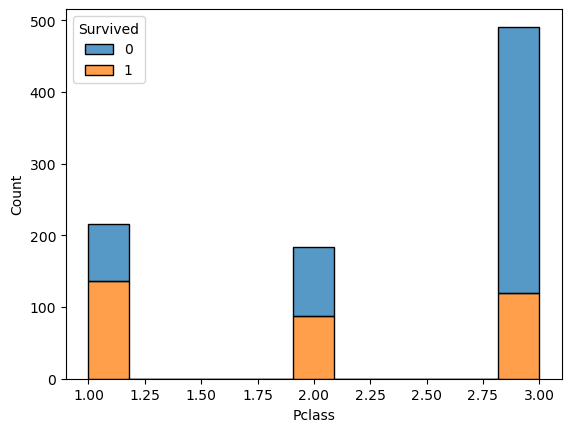

In [32]:
sns.histplot(x="Pclass",hue="Survived",multiple="stack",data=df)
plt.show()

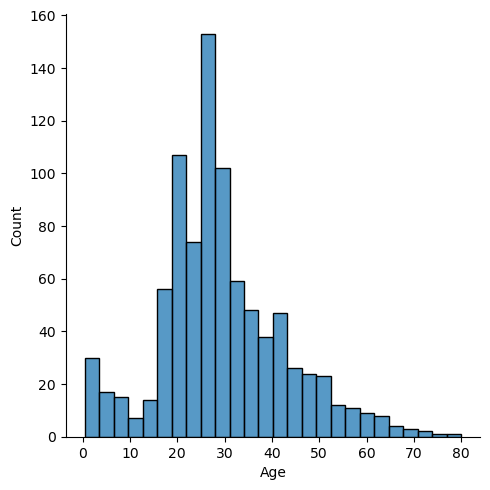

In [33]:
# draw distribution of ages
sns.displot(df.Age)

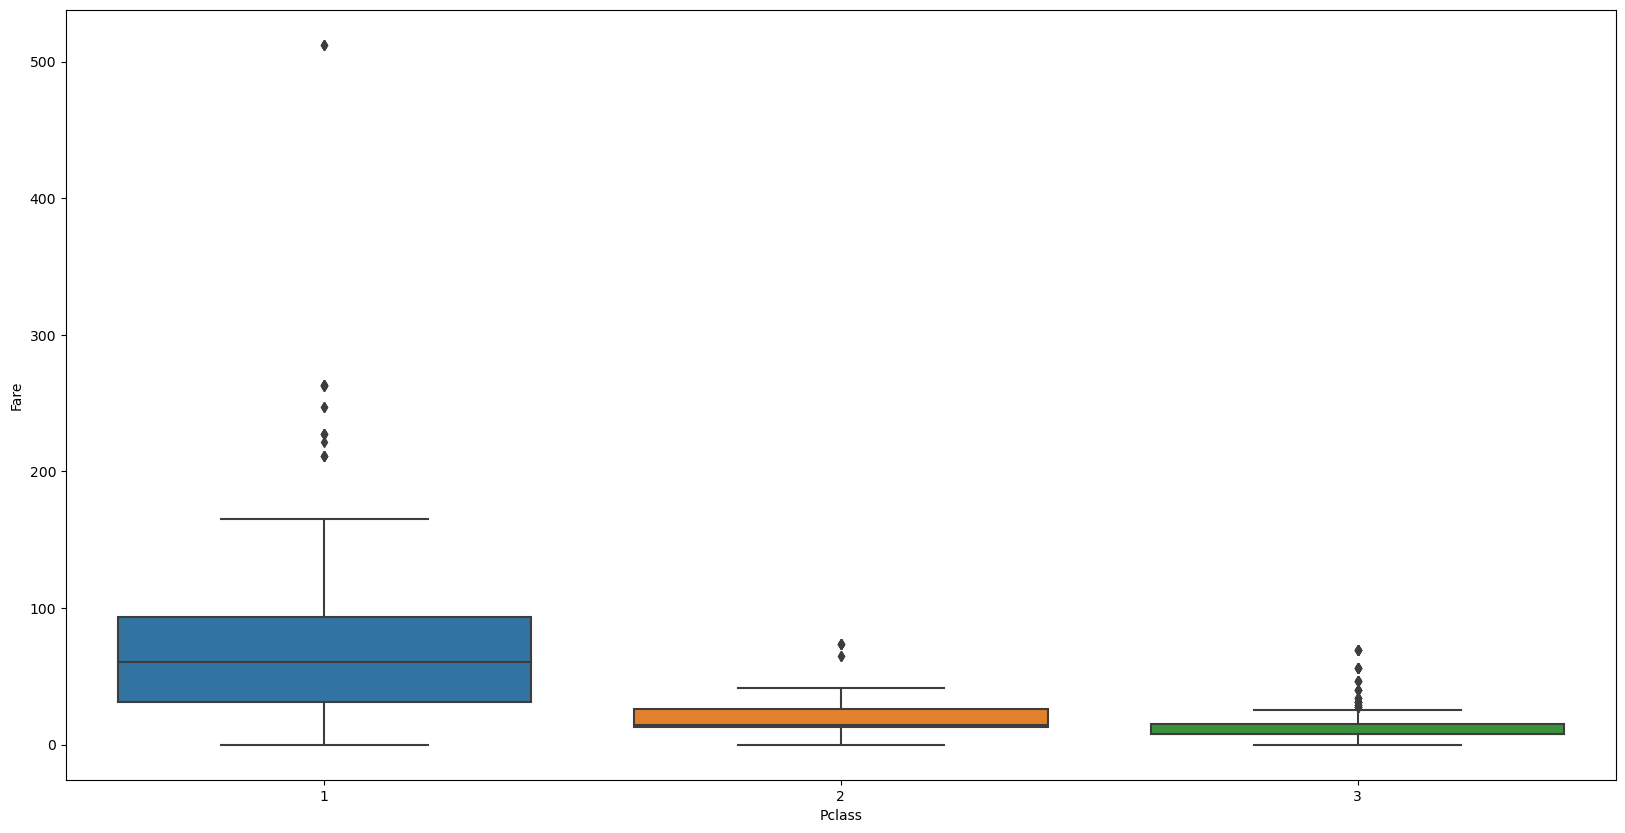

In [34]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df.Pclass,y=df.Fare)
plt.show()

In [45]:
df[df.Fare == df.Fare.max() ]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,C


In [35]:
df_processed = df.drop(columns=["Name","Ticket"])

In [36]:
df_processed = df.drop(columns=["Name","Ticket", "Embarked"])

In [37]:
df_processed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,21.0,1,2,23.4500


In [38]:
# get_dummies tranforms categorical data to numbers
# here we want to transform the "Sex" column from ['male', 'female'] to [0,1]
df_processed.loc[:,["Sex"]] = pd.get_dummies(df.Sex,drop_first=True).values

C:\Users\33695\AppData\Local\Temp\ipykernel_748\607809718.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_processed.loc[:,["Sex"]] = pd.get_dummies(df.Sex,drop_first=True).values


In [39]:
type(pd.get_dummies(df.Sex,drop_first=True).values)

numpy.ndarray

In [40]:
df_processed

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,21.0,1,2,23.4500


In [51]:
df_processed = df_processed.drop(columns="Embarked") # drop already done previously

In [41]:
# this is a way to explicit the "Pclass" column by transforming it to 3 columns corresponding to each of its values
# this is known as encoding
df_processed = pd.concat([df_processed,pd.get_dummies(df_processed.Pclass)],axis=1).drop(columns="Pclass")

In [42]:
df_processed

,Survived,Sex,Age,SibSp,Parch,Fare,1,2,3
PassengerId,,,,,,,,,
1,0,1,22.0,1,0,7.2500,0,0,1
2,1,0,38.0,1,0,71.2833,1,0,0
3,1,0,26.0,0,0,7.9250,0,0,1
4,1,0,35.0,1,0,53.1000,1,0,0
5,0,1,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
887,0,1,27.0,0,0,13.0000,0,1,0
888,1,0,19.0,0,0,30.0000,1,0,0
889,0,0,21.0,1,2,23.4500,0,0,1


In [44]:
from sklearn.model_selection import train_test_split

In [46]:
df_train, df_test = train_test_split(df_processed,test_size = 0.2, stratify = df_processed.Survived) # " define (randomly) training and testing dataframe"

In [47]:
len(df_processed)

891

In [48]:
len(df_train)

712

In [49]:
len(df_test)

179

In [50]:
df_train

,Survived,Sex,Age,SibSp,Parch,Fare,1,2,3
PassengerId,,,,,,,,,
706,0,1,39.0,0,0,26.0000,0,1,0
377,1,0,22.0,0,0,7.2500,0,0,1
765,0,1,16.0,0,0,7.7750,0,0,1
245,0,1,30.0,0,0,7.2250,0,0,1
317,1,0,24.0,1,0,26.0000,0,1,0
...,...,...,...,...,...,...,...,...,...
69,1,0,17.0,4,2,7.9250,0,0,1
539,0,1,26.0,0,0,14.5000,0,0,1
821,1,0,52.0,1,1,93.5000,1,0,0


In [51]:
print(df_processed.Sex.mean())
print(df_train.Sex.mean())
print(df_test.Sex.mean())

0.6475869809203143
0.6432584269662921
0.664804469273743


In [52]:
print(df_processed.Survived.mean())
print(df_train.Survived.mean())
print(df_test.Survived.mean())

0.3838383838383838
0.38342696629213485
0.3854748603351955


In [53]:
df_train.columns

Index(['Survived', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 1, 2, 3], dtype='object')

In [54]:
# get the values of the columns for the training data
X_train = df_train.loc[:,['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 1, 2, 3]].values
y_train = df_train.Survived.values

In [55]:
# get the values of the columns for the test data
X_test = df_test.loc[:,['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 1, 2, 3]].values
y_test = df_test.Survived.values

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
# here we initialize the model
lr_model = LogisticRegression(random_state=0,max_iter=1000) # random_state=0 or 42... means 
# ...i want the same conditions if i re-use the model again

In [58]:
# here we train the model on the training data
lr_model.fit(X=X_train, y=y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [59]:
y_test_predicted = lr_model.predict(X_test) # list of prediction my model will make

In [60]:
y_test_predicted

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [61]:
y_test

array([0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0], dtype=int64)

In [62]:
(y_test_predicted == y_test).sum()/len(y_test)

0.7877094972067039

In [63]:
from sklearn.metrics import confusion_matrix

In [64]:
cf = pd.DataFrame(
    columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"]
)

In [65]:
cf.loc[:,:] = confusion_matrix(y_true= y_test,y_pred= y_test_predicted)

In [66]:
cf

,y_test_0,y_test_1
y_pred_0,96,14
y_pred_1,24,45


In [67]:
cf/len(y_test)

,y_test_0,y_test_1
y_pred_0,0.536313,0.078212
y_pred_1,0.134078,0.251397


In [68]:
from sklearn.metrics import recall_score, precision_score

In [69]:
recall_score(y_true=y_test, y_pred=y_test_predicted)

0.6521739130434783

In [84]:
# compute recall manually: TP/TP+FN
48/(48+16)

0.75

In [70]:
precision_score(y_true=y_test, y_pred=y_test_predicted)

0.7627118644067796

In [86]:
# compute precision manually: TP/TP+FP
48/(48+16)

0.75

In [71]:
from sklearn.metrics import classification_report

In [72]:
report =classification_report(y_true=y_test, y_pred=y_test_predicted)

In [73]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [86]:
from sklearn.neural_network import MLPClassifier

In [87]:
X_train.shape

(712, 8)

In [89]:
# try a new classifier: Multi-Layer Perceptron classifier
nn_model = MLPClassifier(hidden_layer_sizes=(20,10),max_iter=1000) # 2 layers of 20 and 10 nodes

In [90]:
nn_model.fit(X=X_train,y=y_train)

MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000)

In [91]:
y_test_predicted_nn = nn_model.predict(X_test)

In [92]:
report_nn = classification_report(y_pred=y_test_predicted_nn,y_true=y_test)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
# Try a Decision Tree classifier
dt_model = DecisionTreeClassifier()

In [76]:
dt_model.fit(X=X_train,y=y_train)

DecisionTreeClassifier()

In [77]:
y_test_predicted_dt = dt_model.predict(X_test)

In [78]:
report_dt = classification_report(y_pred=y_test_predicted_dt,y_true=y_test)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
# Try an ensemble classifier: Random Forest
rf_model = RandomForestClassifier()

In [82]:
rf_model.fit(X=X_train,y=y_train) # fit means train

RandomForestClassifier()

In [83]:
y_test_predicted_rf = rf_model.predict(X_test)

In [84]:
report_rf = classification_report(y_pred=y_test_predicted_rf,y_true=y_test)

In [94]:
print("Report of logistic regression")

print(report)

Report of logistic regression
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



In [93]:
print("Report of MLP model")
print(report_nn)

Report of MLP model
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       110
           1       0.76      0.72      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [79]:
print("Report of Decision Tree classifier model")
print(report_dt)

Report of Decision Tree classifier model
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       110
           1       0.71      0.72      0.72        69

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [85]:
print("Report of Random Forest model")
print(report_rf)

Report of Random Forest model
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       110
           1       0.68      0.62      0.65        69

    accuracy                           0.74       179
   macro avg       0.73      0.72      0.72       179
weighted avg       0.74      0.74      0.74       179



In [113]:
df_train.Fare.max()

512.3292

In [114]:
df_test.Fare.max()

211.3375

Let's remove outliers from our data

In [95]:
df_train_no_outliers = df_train.drop(index=df_train[df_train.Fare>300].index)

In [96]:
df_train[df_train.Fare>300]

,Survived,Sex,Age,SibSp,Parch,Fare,1,2,3
PassengerId,,,,,,,,,
738,1,1,35.0,0,0,512.3292,1,0,0


In [106]:
df_test_no_outliers = df_test.drop(index=df_test[df_test.Fare>300].index)

In [107]:
df_test[df_test.Fare>300]

,Survived,Sex,Age,SibSp,Parch,Fare,1,2,3
PassengerId,,,,,,,,,
680,1,1,36.0,0,1,512.3292,1,0,0
259,1,0,35.0,0,0,512.3292,1,0,0


In [108]:
X_train_no_outliers = df_train_no_outliers.loc[:,['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 1, 2, 3]].values
y_train_no_outliers = df_train_no_outliers.Survived.values

In [109]:
X_test_no_outliers = df_test_no_outliers.loc[:,['Sex', 'Age', 'SibSp', 'Parch', 'Fare', 1, 2, 3]].values
y_test_no_outliers = df_test_no_outliers.Survived.values

Train decision tree model with no outliers

In [110]:
dt_no_model = DecisionTreeClassifier()

In [111]:
dt_no_model.fit(X=X_train_no_outliers,y=y_train_no_outliers)

DecisionTreeClassifier()

In [112]:
y_test_predicted_dt_no = dt_no_model.predict(X_test_no_outliers)

In [113]:
report_dt_no = classification_report(y_pred=y_test_predicted_dt_no,y_true=y_test_no_outliers)

In [114]:
# Better performance!
print(report_dt_no)

              precision    recall  f1-score   support

           0       0.82      0.81      0.82       110
           1       0.70      0.72      0.71        67

    accuracy                           0.77       177
   macro avg       0.76      0.76      0.76       177
weighted avg       0.78      0.77      0.77       177



In [115]:
cf_no = pd.DataFrame(
    columns=["y_test_0","y_test_1"],index=["y_pred_0","y_pred_1"]
)

cf_no.loc[:,:] = confusion_matrix(y_true= y_test_no_outliers,y_pred= y_test_predicted_dt_no)

cf_no

,y_test_0,y_test_1
y_pred_0,89,21
y_pred_1,19,48
